In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

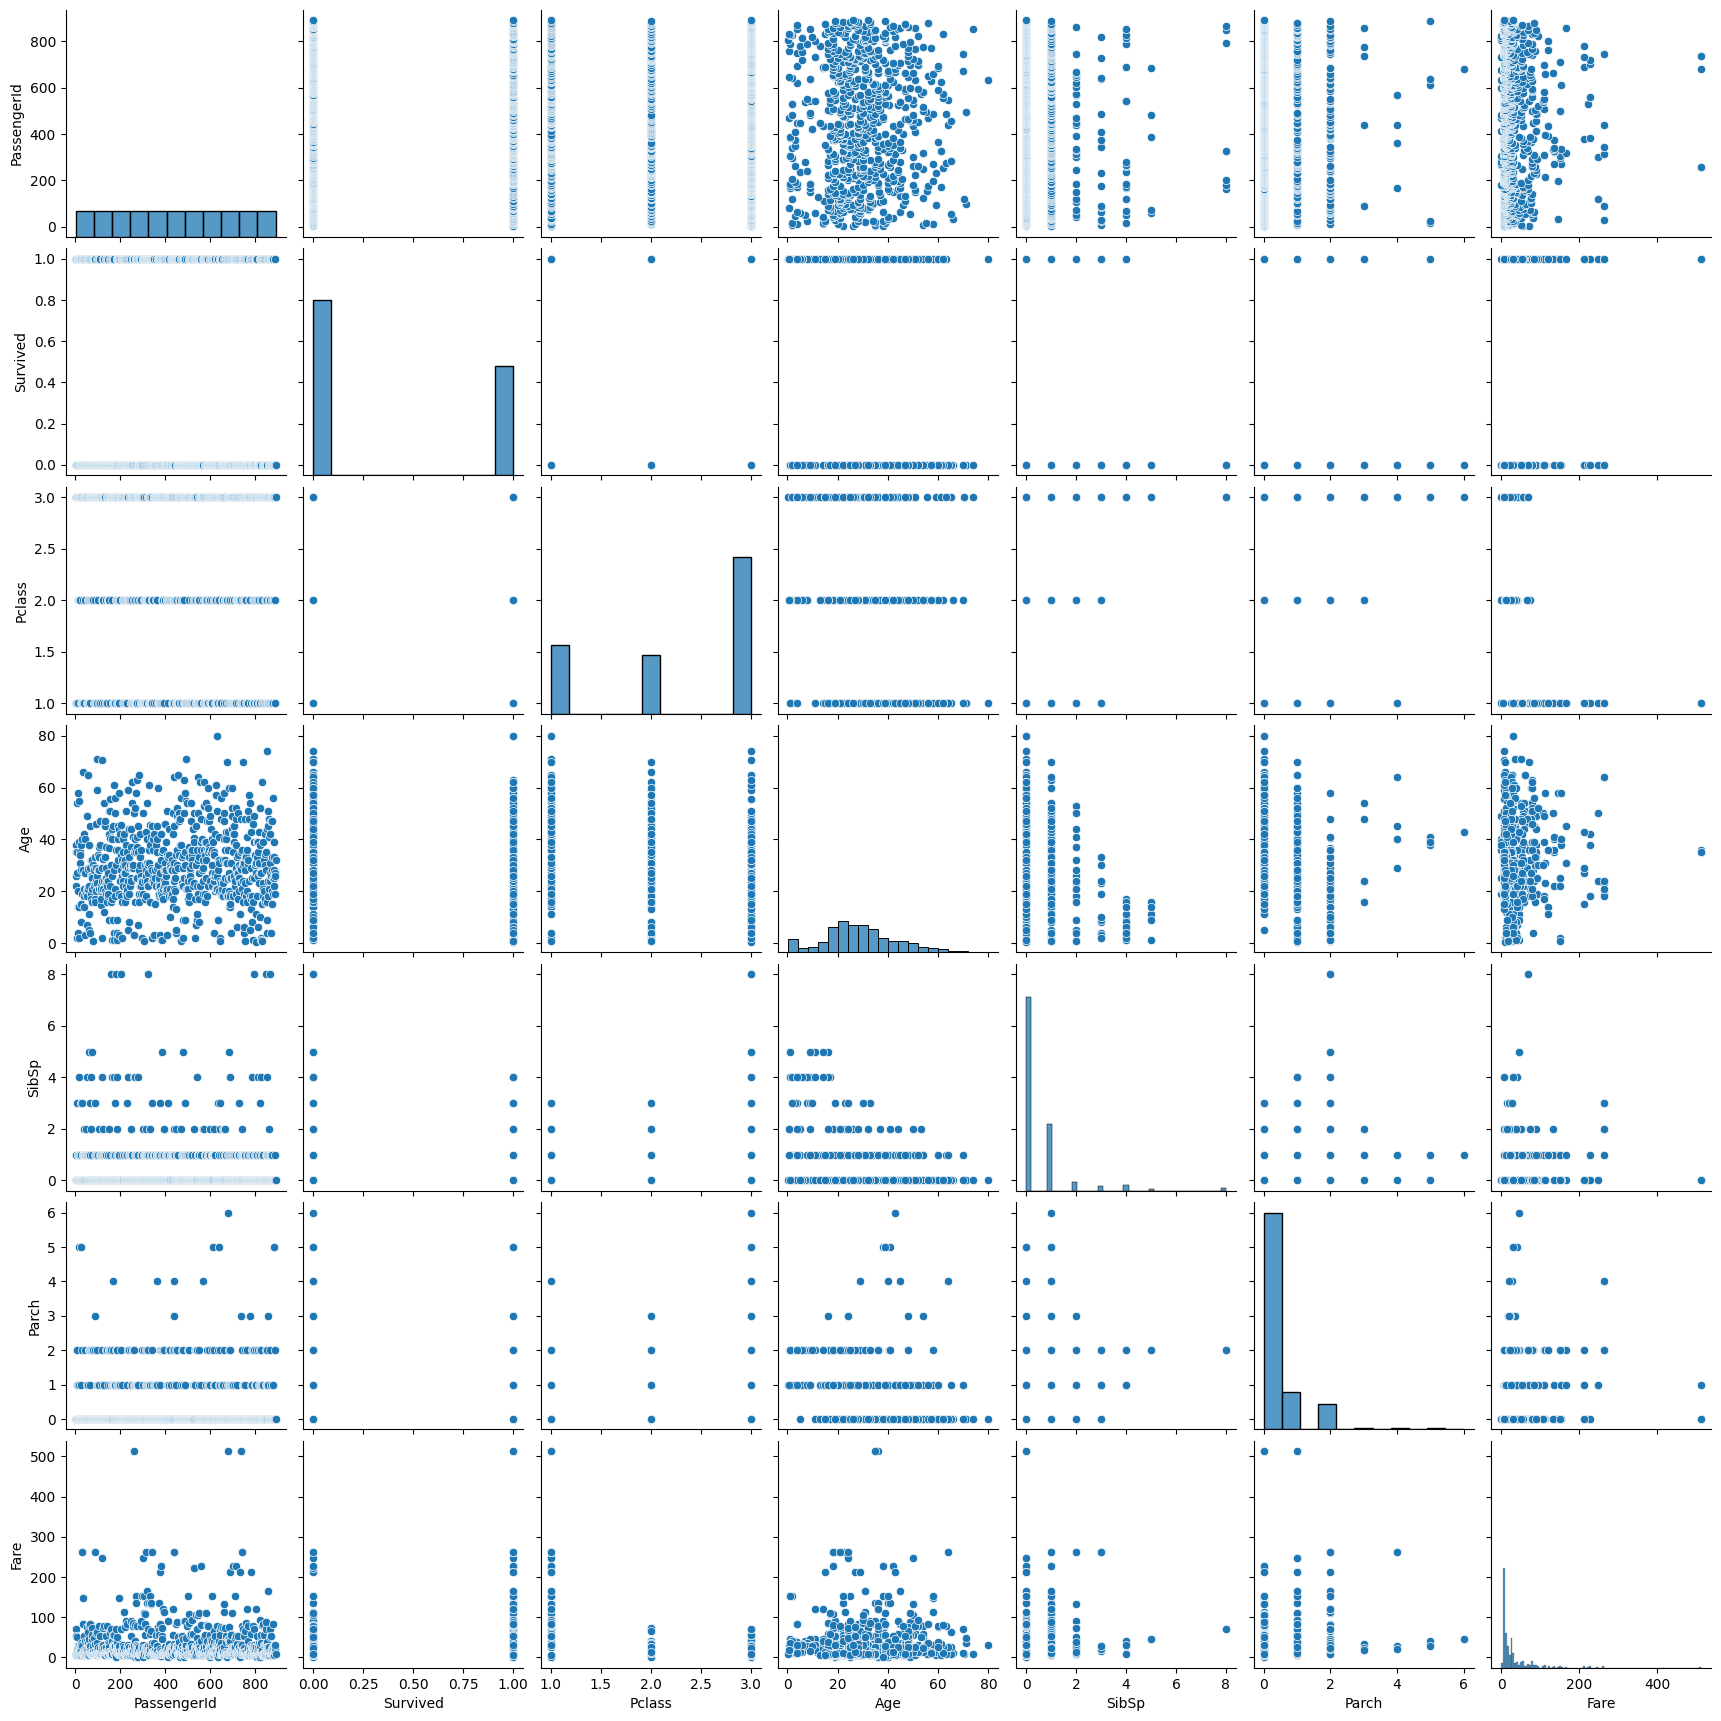

In [ ]:
sns.pairplot(titanic_data)
plt.show()

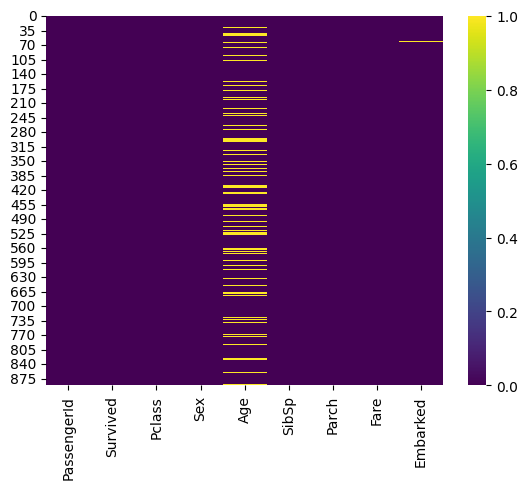

In [ ]:
sns.heatmap(titanic_data.isnull(), cmap='viridis')
plt.show()

In [ ]:
titanic_data.corr()

<ipython-input-58-d6a665489a2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-59-e5949f71eebc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr().drop('PassengerId', axis=1), annot=True, cmap='viridis')


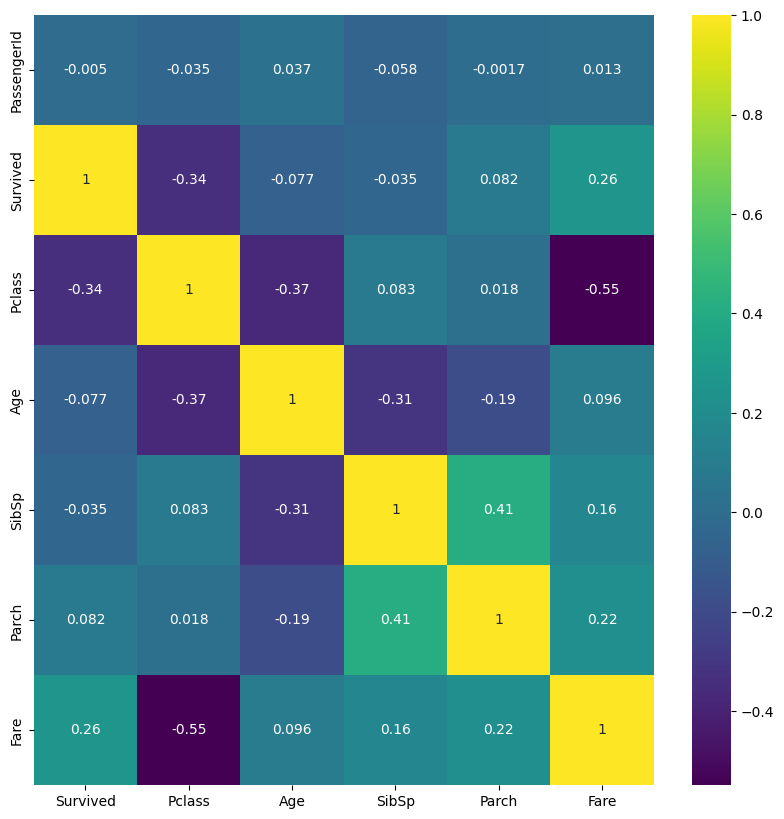

In [ ]:
# prompt: let's visualize the age correlations heat map, wrt all the other attributes except for pid

plt.figure(figsize=(10, 10))
sns.heatmap(titanic_data.corr().drop('PassengerId', axis=1), annot=True, cmap='viridis')
plt.show()


 It represents the Pearson correlation coefficients between different variables. Each cell in the matrix shows the correlation between two variables. The value of the correlation coefficient ranges from -1 to 1, where:

    1 indicates a perfect positive correlation.
    -1 indicates a perfect negative correlation.
    0 indicates no correlation.

Let's interpret the correlations:

    PassengerId: Appears to have very little correlation with other variables, as indicated by values close to 0. This suggests PassengerId is just an identifier.

    Survived:
        Negative Correlation with Pclass (-0.338481): Higher class (lower Pclass number) passengers had a higher chance of survival. This could be due to better access to lifeboats in higher classes.
        Positive Correlation with Fare (0.257307): Passengers who paid more (higher fares) had a higher survival rate, which might be related to higher-class passengers having a better chance of survival.

    Pclass (Passenger Class):
        Negative Correlation with Age (-0.369226): Younger passengers tended to be in lower classes.
        Negative Correlation with Fare (-0.549500): Higher classes (lower Pclass number) correspond to higher fares.

    Age:
        Negative Correlation with SibSp (-0.308247): Older passengers were likely to have fewer siblings or spouses aboard.
        Negative Correlation with Parch (-0.189119): Older passengers were less likely to travel with parents or children.

    SibSp (Siblings/Spouses aboard):
        Positive Correlation with Parch (0.414838): Passengers with siblings or spouses aboard were more likely to also have parents or children aboard.

    Parch (Parents/Children aboard):
        Positive Correlation with Fare (0.216225): Passengers with parents or children aboard tended to pay higher fares, possibly indicating larger cabins or higher classes.

    Fare:
        Generally, higher fares correlate with higher chances of survival and lower Passenger class (higher status).

This correlation matrix provides insight into the relationships between different aspects of passenger data on the Titanic, such as socio-economic status (indicated by Pclass and Fare), family size (indicated by SibSp and Parch), and survival rates. Remember, while correlation can indicate a relationship between variables, it does not imply causation.

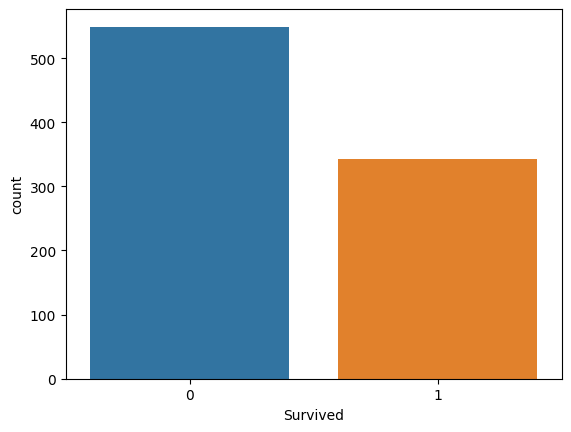

In [ ]:
# Count plot for survival
sns.countplot(x='Survived', data=titanic_data)
plt.show()

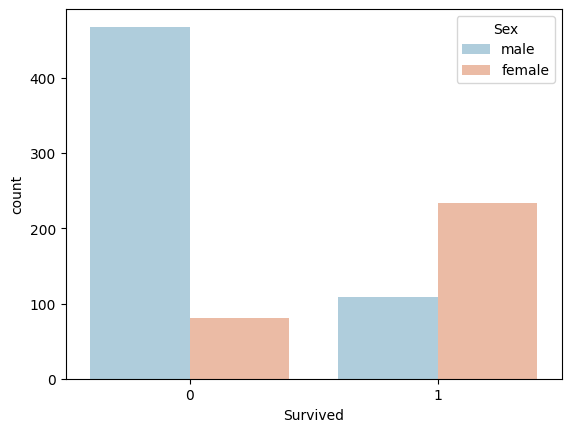

In [ ]:
# Survival based on gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data, palette='RdBu_r')
plt.show()

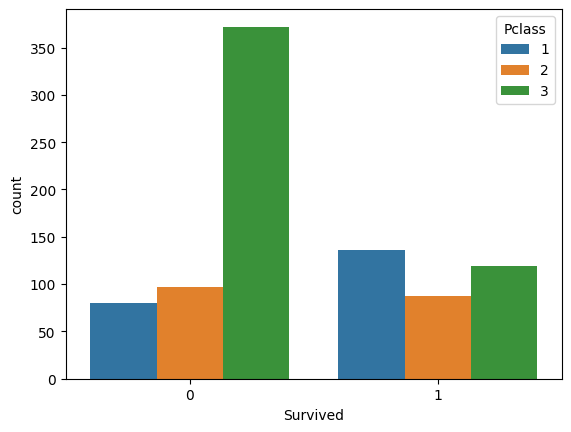

In [ ]:
# Survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.show()

<ipython-input-63-32c47361a262>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['Age'].dropna(), kde=False, color='darkred', bins=30)


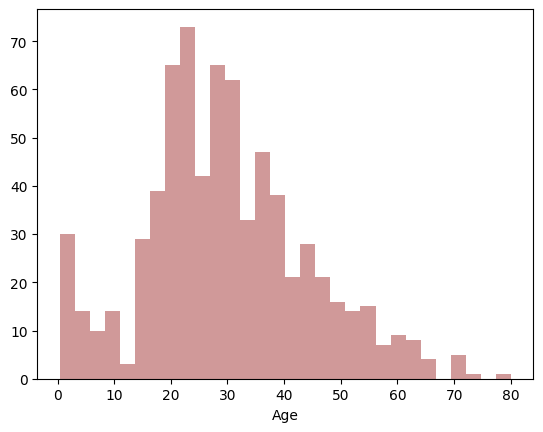

In [ ]:
# Distribution of age
sns.distplot(titanic_data['Age'].dropna(), kde=False, color='darkred', bins=30)
plt.show()

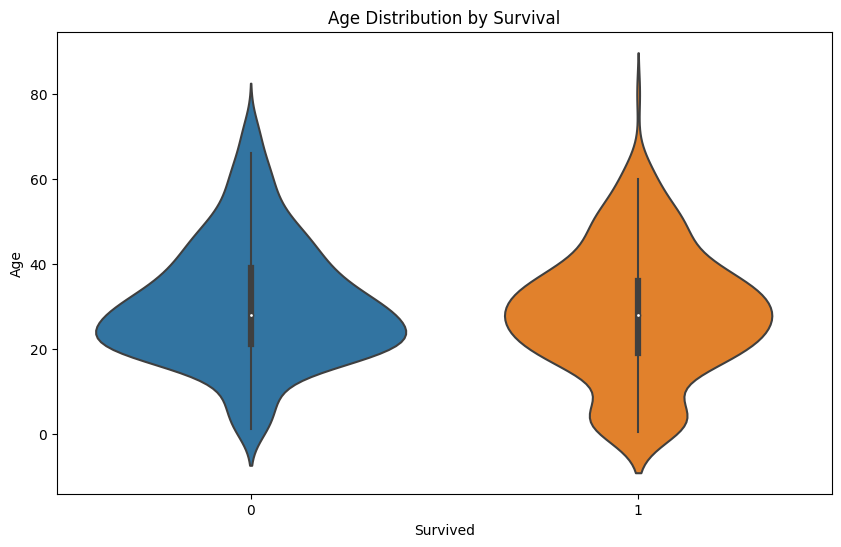

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=titanic_data, split=True)
plt.title('Age Distribution by Survival')
plt.show()

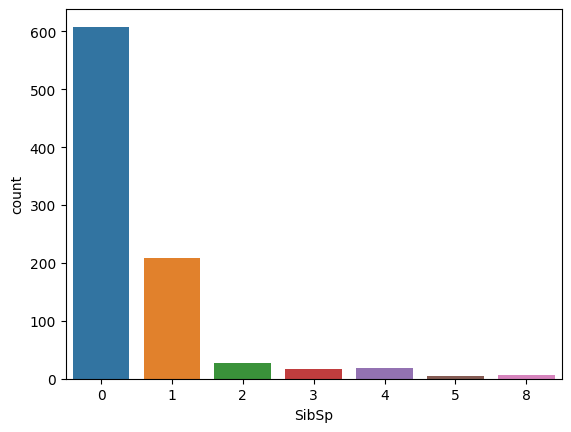

In [ ]:
# Siblings or spouses aboard
sns.countplot(x='SibSp', data=titanic_data)
plt.show()

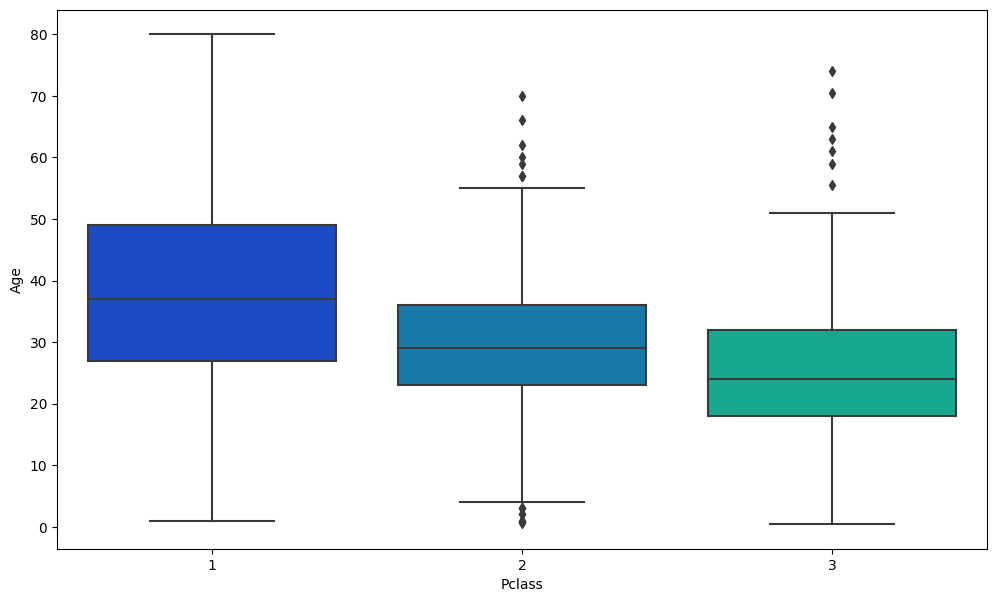

In [ ]:
# Box plot for age by passenger class
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=titanic_data, palette='winter')
plt.show()

In [ ]:
# Convert categorical features using dummy variables
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)

# Drop the columns not needed
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

# Concatenate the new dummy columns
train = pd.concat([titanic_data, sex, embark], axis=1)

In [ ]:
# Data with known age
known_age = titanic_data[titanic_data['Age'].notna()]

# Data with unknown age
unknown_age = titanic_data[titanic_data['Age'].isna()]

# Separate features and target for known age data
X_known = known_age.drop('Age', axis=1)
y_known = known_age['Age']

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_known, y_known)

LinearRegression()

In [ ]:
# Predict ages
X_unknown = unknown_age.drop('Age', axis=1)
predicted_ages = model.predict(X_unknown)

# Fill in the missing values in the original data
titanic_data.loc[titanic_data['Age'].isna(), 'Age'] = predicted_ages

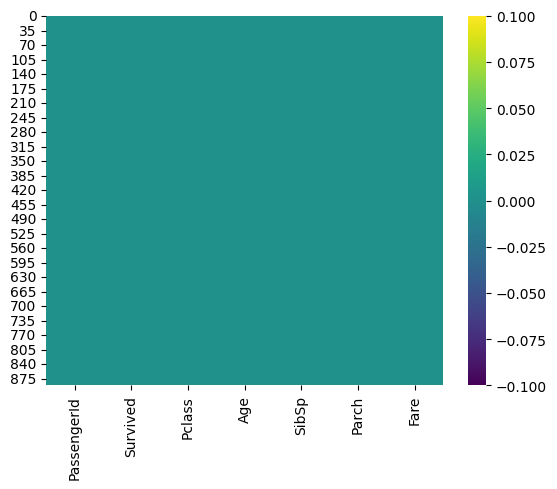

In [ ]:
sns.heatmap(titanic_data.isnull(), cmap='viridis')
plt.show()

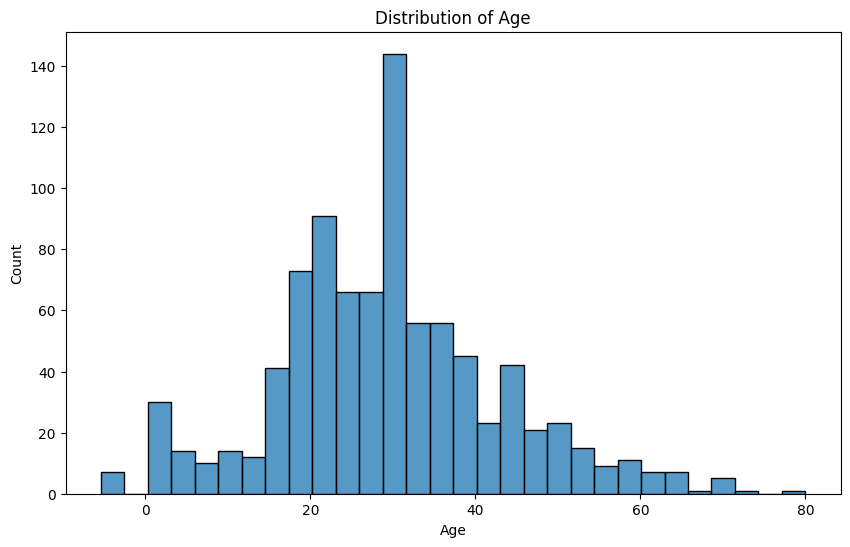

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], kde=False, bins=30)
plt.title('Distribution of Age')
plt.show()

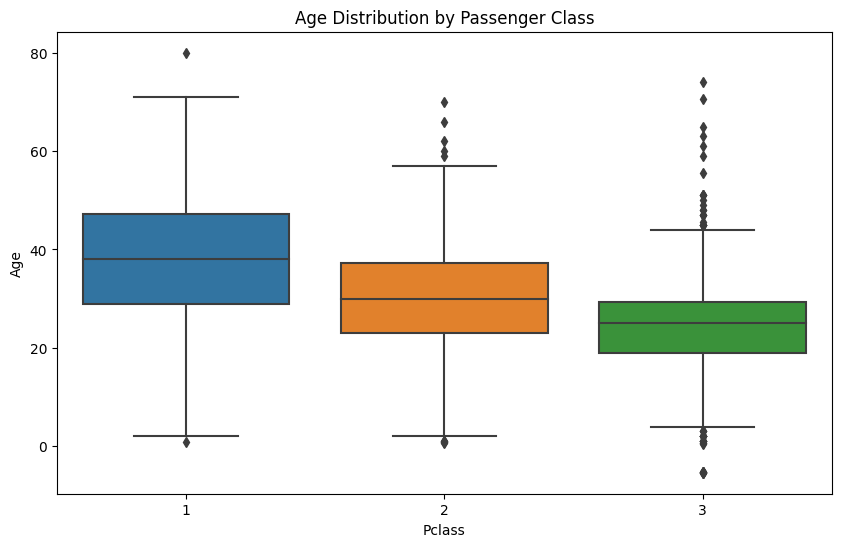

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
plt.title('Age Distribution by Passenger Class')
plt.show()

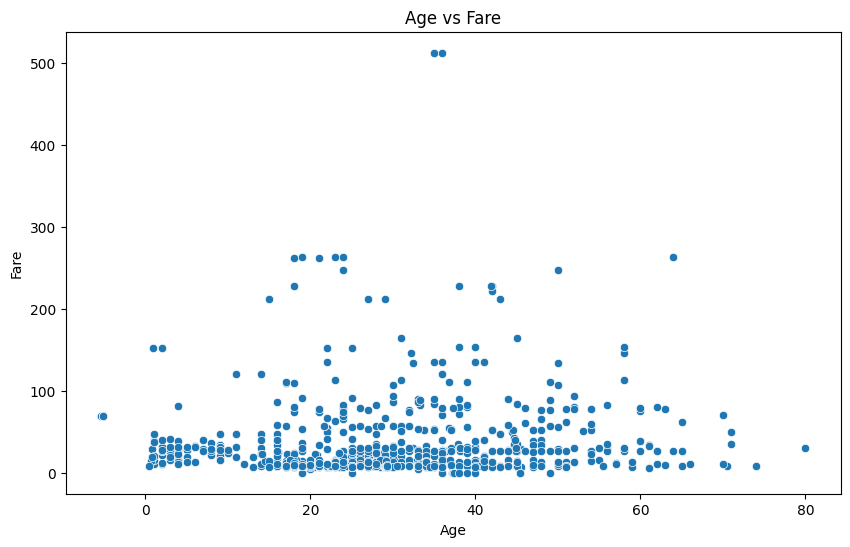

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_data)
plt.title('Age vs Fare')
plt.show()

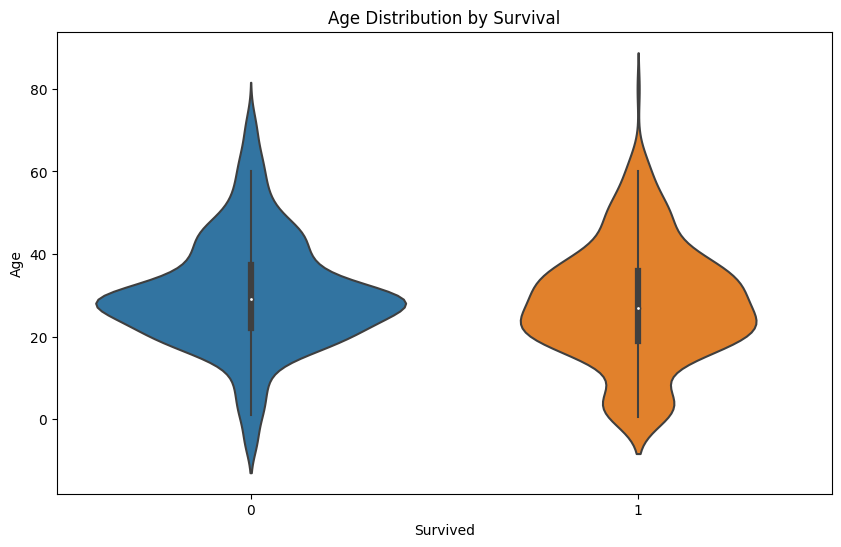

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=titanic_data, split=True)
plt.title('Age Distribution by Survival')
plt.show()